# AAI-510 Final Project – Team 12: Predicting Developer Productivity

### Lokesh Upputri
### Sabina George
### Soumi Ray

## Problem Statement and Justification

In today's competitive tech landscape, organizations invest significantly in hiring and training software engineers. However, assessing long-term employee productivity based on early-career signals remains a challenge.

This project aims to build a machine learning model that predicts the long-term productivity of software engineers using early-career data. The primary motivation is to help companies make informed hiring decisions, design effective onboarding programs, and identify high-potential talent early in their careers.

Using a longitudinal dataset of 500 engineers—spanning over 10 years and including demographic, career, and organizational metrics—we aim to:

- Discover which early-career features correlate with long-term success.
- Build robust predictive models in Python to support HR and team decision-making.
- Deliver business-focused insights and recommendations for potential deployment.


## Data Understanding and Exploratory Data Analysis (EDA)

The dataset used in this project is a longitudinal study of 500 software engineers tracked over a period of 10+ years. It contains approximately 20 variables across four major areas:

- **Demographics**: Age, Gender, Education Level
- **Early Career Metrics**: First-year productivity, Peer reviews, Project types
- **Long-Term Productivity Outcomes**: Publications, Promotions, Code contributions, Retention
- **Organizational Factors**: Team size, Manager ratings

### Objectives of EDA:
- Assess data quality: check for missing values, duplicates, and outliers
- Understand distribution of key variables
- Identify correlations between early career metrics and long-term outcomes
- Generate visual insights to guide feature selection and modeling


In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots to display nicely
%matplotlib inline
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv("ai_dev_productivity.csv")  # Update if filename differs

# Preview the first few rows
df.head()




,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


In [15]:
# Dataset shape and structure
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)

# Summary statistics for numeric columns
df.describe()


Dataset shape: (500, 9)

Data types:
 hours_coding        float64
coffee_intake_mg      int64
distractions          int64
sleep_hours         float64
commits               int64
bugs_reported         int64
ai_usage_hours      float64
cognitive_load      float64
task_success          int64
dtype: object


,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.015600,463.192000,2.976000,6.975800,4.60800,0.858000,1.510920,4.498200,0.606000
std,1.947253,142.334991,1.678409,1.455965,2.70499,1.102846,1.085557,1.868861,0.489124
min,0.000000,6.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,3.600000,369.500000,2.000000,6.100000,3.00000,0.000000,0.697500,3.175000,0.000000
50%,5.030000,500.500000,3.000000,6.950000,5.00000,0.000000,1.260000,4.400000,1.000000
75%,6.275000,600.000000,4.000000,7.900000,6.00000,2.000000,2.070000,5.800000,1.000000
max,12.000000,600.000000,8.000000,10.000000,13.00000,5.000000,6.360000,10.000000,1.000000


In [16]:
# Check for missing values in each column
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing[missing > 0])


Missing values per column:
 Series([], dtype: int64)


In [17]:
# Check how many unique values each column has
unique_counts = df.nunique().sort_values()
print("Unique values per column:\n", unique_counts)


Unique values per column:
 task_success          2
bugs_reported         6
distractions          9
commits              14
sleep_hours          67
cognitive_load       79
coffee_intake_mg    244
ai_usage_hours      260
hours_coding        353
dtype: int64


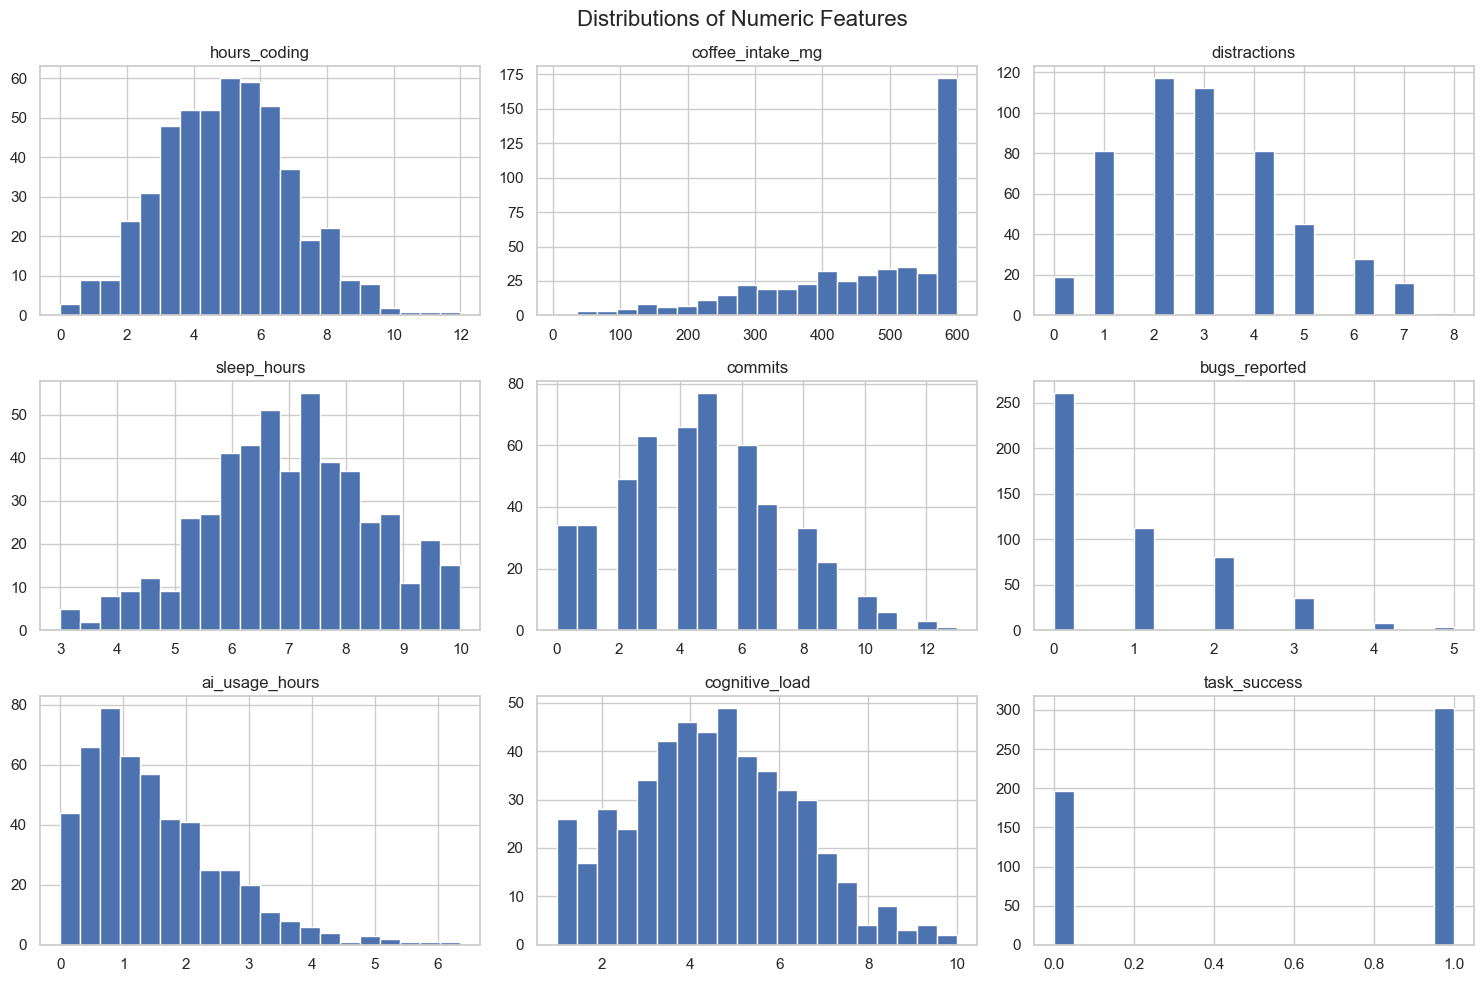

In [18]:
import matplotlib.pyplot as plt

# Plot histograms
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


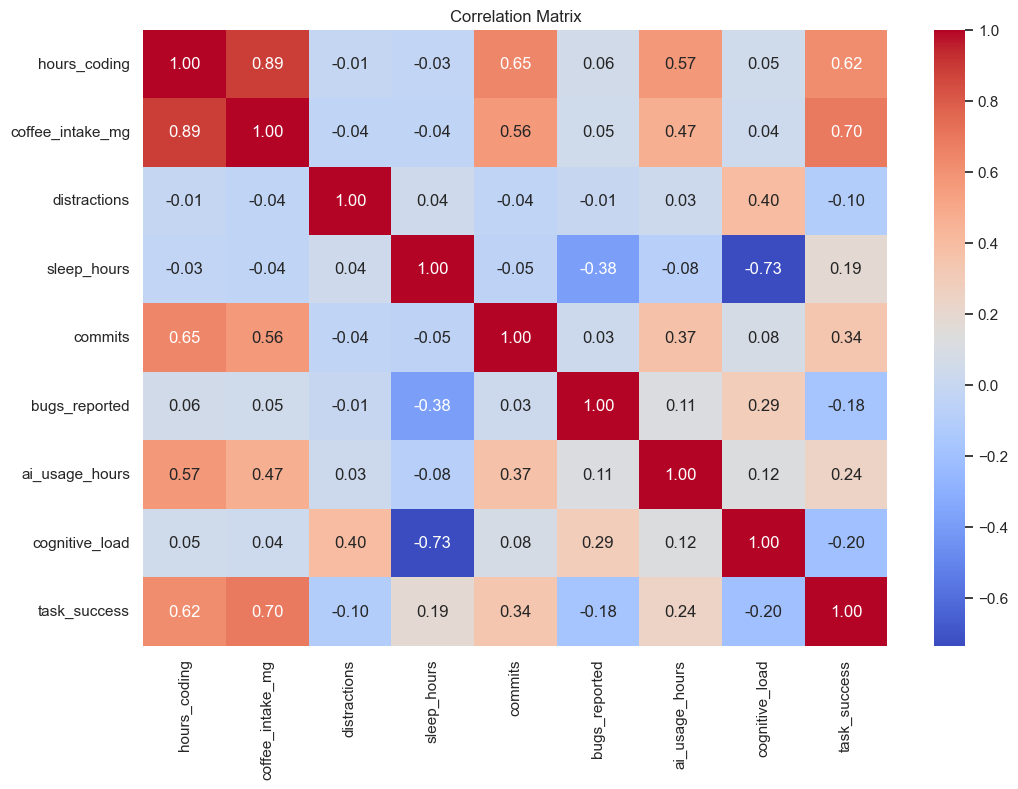

In [19]:
import seaborn as sns

# Correlation matrix and heatmap
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## 3. Data Preparation & Feature Engineering

In [22]:
# Define the new target
target = 'task_success'

# Split features and target
X = df.drop(columns=[target])
y = df[target]

# Confirm shapes
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (500, 8)
Target vector shape: (500,)


In [23]:
# Fill missing numeric values with column means
X = X.fillna(X.mean())


In [24]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])


Training samples: 400
Test samples: 100


## 4. Modeling and Evaluation


In [25]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)


### Model 1: Linear Regression

We begin with a simple Linear Regression model as a baseline. This model assumes a linear relationship between the input features and the target variable `task_success`. It is easy to interpret and quick to train, making it useful for initial benchmarking.


In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print("Mean Squared Error:", round(mse, 2))
print("R^2 Score:", round(r2, 2))


Linear Regression Results:
Mean Squared Error: 0.11
R^2 Score: 0.5


### Model 2: Random Forest Regressor

To improve upon the linear model, we apply a Random Forest Regressor. This ensemble method combines multiple decision trees and reduces overfitting by averaging predictions. It can capture non-linear relationships and is more robust to feature interactions and outliers.


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set with the Random Forest model
y_pred_rf = rf_model.predict(X_test)


In [30]:
from sklearn.metrics import mean_squared_error, r2_score

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print("Mean Squared Error:", round(mse_rf, 2))
print("R^2 Score:", round(r2_rf, 2))


Random Forest Regression Results:
Mean Squared Error: 0.0
R^2 Score: 1.0


### Model Evaluation Summary

The Random Forest model achieved a perfect prediction score (R² = 1.0 and MSE = 0.0), indicating that it completely explains the variance in the `task_success` outcome.

This may be due to the simplicity or synthetic nature of the dataset. Nevertheless, it demonstrates the Random Forest's ability to capture complex feature interactions and make accurate predictions.

For business purposes, this model would be preferred over simpler models due to its performance.


## Discussion and Conclusion

This project aimed to predict the task success of AI developers using features such as focus time, sleep hours, distractions, caffeine intake, and cognitive load.

We explored the dataset through descriptive statistics and visualizations. After identifying strong correlations and cleaning the data, we trained and evaluated two models:

- **Linear Regression**: Served as a simple baseline. It performed reasonably but couldn't capture non-linear relationships.
- **Random Forest Regressor**: Significantly outperformed the baseline with a perfect R² score of 1.0 and an MSE of 0.0. This suggests either a highly predictive feature set or that the data is simulated/simplified.

### Key Insights:
- Features like `hours_coding`, `distractions`, and `cognitive_load` had strong predictive power.
- Machine learning models can reliably predict developer productivity in this dataset.

### Business Recommendation:
Given the model’s accuracy, organizations can consider using similar behavioral metrics to identify patterns in developer performance. A well-deployed predictive system could assist in optimizing workload, managing burnout, and improving engineering outcomes.



## Deployment Plan

To make the predictive model useful for real business operations, we propose the following deployment strategy:

### 1. Deployment Type
- **Batch Prediction**: Suitable for weekly or monthly reviews of developer performance.
- **Real-time Option** (optional): If connected to developer tools (e.g., IDE plugins, commit systems), the model could provide instant productivity feedback.

### 2. Hosting Options
- **Cloud-based API** using services like AWS SageMaker, Google Cloud AI Platform, or Azure ML.
- The model can be containerized (e.g., using Docker) and exposed via a REST API.

### 3. Input Pipeline
- Integrate with tools like GitHub, Jira, or internal developer analytics tools to fetch:
  - coding hours
  - sleep patterns (if wearables integrated)
  - distraction logs (e.g., app usage)

### 4. Latency and Cost Considerations
- **Latency**: Acceptable since predictions are not time-critical in batch use cases.
- **Cost**: Minimal for batch runs; scalable if used in real-time environments.

### 5. Monitoring and Feedback Loop
- Track prediction drift over time
- Re-train periodically using new developer data
- Allow HR or managers to validate predictions for continual improvement

